**Importing Required Library**

In [ ]:
# Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling Library
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from xgboost import XGBRegressor
from sklearn.metrics import *
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Walmart DataSet.csv') # loading the Required Dataset
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**KEY INSIGHT:**
 - All 8 columns have 6435 non null values, so there are no missing values but we further check it.
 - The data types (int64 for numerical and object for categorical) seem appropriate for each column except Date Column.

In [ ]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

### **Key Insights from the Summary Statistics**  

#### **1. Sales Performance Overview**  
- **Average weekly sales per store**: $1,046,965  
- **Sales range**: $209,862 (min) to $3,818,686 (max)  
- **High variation**: Standard deviation ($564,366) suggests large differences in sales between stores.  

#### **2. Holiday Sales Impact**  
- **Holiday occurrences are low** (mean `Holiday_Flag` = 0.06993), meaning only ~7% of weeks are holidays.  
- **Sales in peak weeks (max = $3.8M)** might be influenced by holidays or seasonal factors.  

#### **3. External Factors & Correlations**  
- **Temperature Range**: From -2.06°F to 100.14°F (extreme values may impact customer footfall).  
- **Fuel Prices**: Range from $2.47 to $4.47, which might impact consumer spending behavior.  
- **CPI and Unemployment Trends**:  
  - CPI ranges from **126.06 to 227.23** (indicating inflation impact).  
  - Unemployment ranges from **3.88% to 14.31%**, suggesting economic conditions vary significantly across time.  

#### **4. Store Distribution & Performance**  
- **Stores range from 1 to 45**, with a median store number of 23.  
- **Higher sales are concentrated in specific stores**, so a store-wise sales analysis can highlight high-performing locations.  


# **DATA CLEANING:**

In [ ]:
print(f' Total Null  Value Present In Our Dataset: {df.isnull().sum().sum()}') # checking the null values in the dataset
print(f' Total Duplicates Present In Our Dataset: {df.duplicated().sum()}') # checking the duplicate values in the dataset

 Total Null  Value Present In Our Dataset: 0
 Total Duplicates Present In Our Dataset: 0


Dataset Notes 📝
- No Null Values – Every column is fully populated, so no missing data handling is needed.
-No Duplicate Records – The dataset is clean, meaning no need for deduplication.
- Ready for Analysis – Data preprocessing can now focus on formatting and transformations.

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y') # Converting the Datatype of Date Column into 'DateTime' from 'Object'
df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Extracting The 'Month' and 'Year' column from the 'Date' Column so that we can analysis the data on the monthly and yearly bases
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

# **Task To Be Perform:**

# **a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

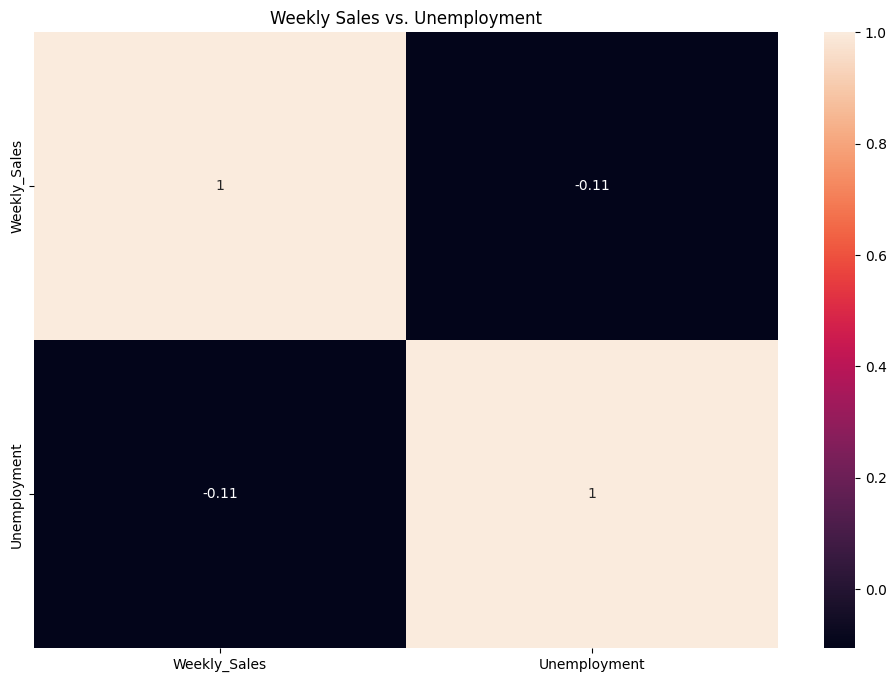

In [ ]:
a = df[['Weekly_Sales','Unemployment']]

# Visualize the relationship Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(a.corr(),annot=True)
plt.title('Weekly Sales vs. Unemployment')
plt.show()

# **Insight on Unemployment vs. Weekly Sales (-0.11 Correlation):**
Negative Correlation (-0.11): This suggests that as unemployment increases, weekly sales tend to decrease, but the relationship is weak.
Economic Impact: Higher unemployment may reduce consumer spending power, leading to lower sales in some stores.

- Are Weekly Sales Affected by Unemployment?

Yes, but weakly. The correlation is negative, indicating a slight decline in sales when unemployment rises, but other factors may also be influencing sales.

In [ ]:
# Which Stores Are Suffering the Most?

# Group by store and calculate average sales and unemployment
store_sales_unemployment = df.groupby("Store")[["Weekly_Sales", "Unemployment"]].corr().unstack().iloc[:,1]

# Sort stores by highest negative correlation
affected_stores = store_sales_unemployment.sort_values()

print(affected_stores.head())  # Stores most negatively impacted


Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: (Weekly_Sales, Unemployment), dtype: float64


# **b. If the weekly sales show a seasonal trend, when and what could be the reason?**

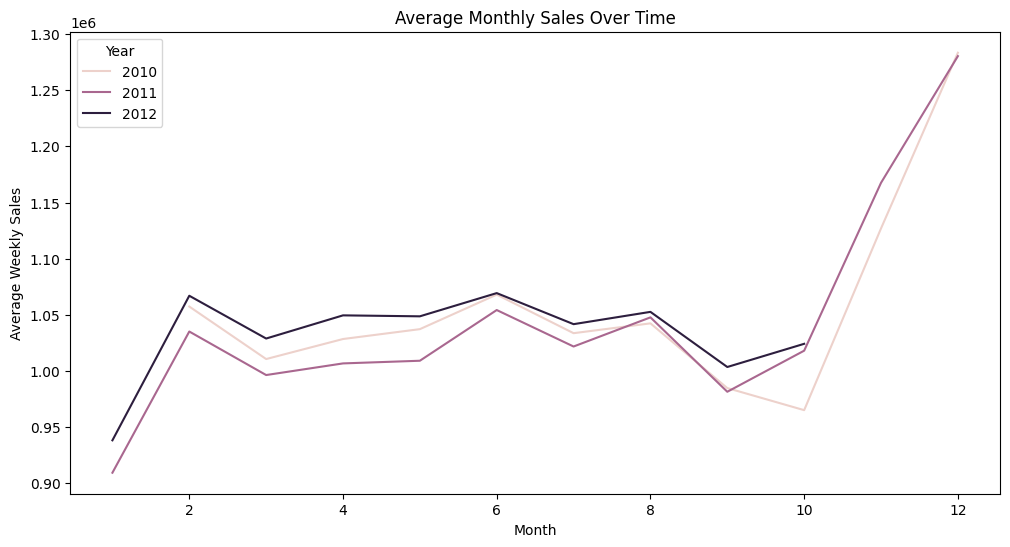

In [ ]:
# Group by month and year, then calculate the average weekly sales
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plotting average monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales, color='warmcolor')
plt.title('Average Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()



### **Seasonal Trend in Weekly Sales**  
From the line chart, we can see **clear seasonal trends in sales over time**:

#### **1. Sales Peaks in February and December**
- **February Spike**: Likely due to post-holiday shopping, promotions, and clearance sales or may be becuase of  this month, which is also known as " The Month Of Love".  
- **December Surge**: A sharp increase in sales, most likely driven by the **holiday season (Christmas, New Year shopping, and holiday discounts).**  

#### **2. Sales Dip Around September to October**
- This decline could be due to **back-to-school spending winding down** and no major shopping events during this period.  

#### **3. Gradual Rise in Mid-Year (March–August)**
- Moderate sales levels suggest **steady consumer spending** before holiday shopping ramps up.  

### **Conclusion**  
- **Yes, sales exhibit a seasonal trend**—rising in **December and February**, dipping around **September-October**.  
- **Main reasons**: **Holiday shopping, clearance sales, and promotional events drive peaks**, while slow periods correspond to months without major shopping events.  



# **c. Does temperature affect the weekly sales in any manner?**

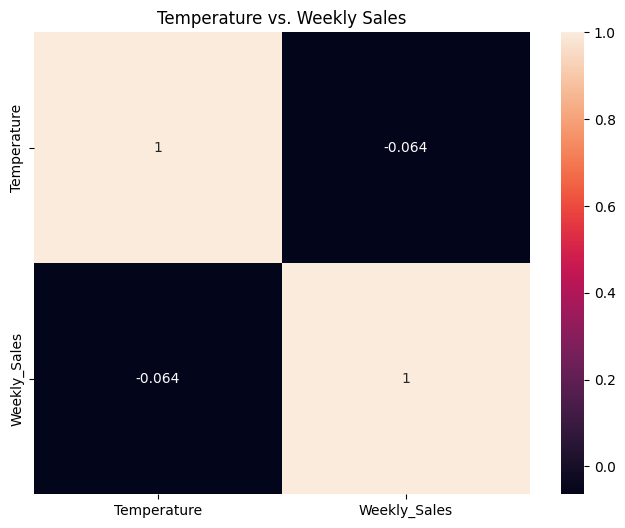

In [ ]:
temp_sales_correlation = df[['Temperature','Weekly_Sales']]

# Visualize the relationship Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(temp_sales_correlation.corr(),annot=True)
plt.title('Temperature vs. Weekly Sales')
plt.show()


**Observations:**

  Based on the correlation heatmap, the correlation coefficient between Temperature and Weekly Sales is -0.064. This indicates a very weak negative correlation, meaning that temperature has little to no significant effect on weekly sales. The relationship is too weak to conclude that temperature plays a major role in influencing sales.

# **d. How is the Consumer Price index affecting the weekly sales of various stores?**

Text(0.5, 1.0, 'Consumer Price Index (CPI) vs. Weekly Sales')

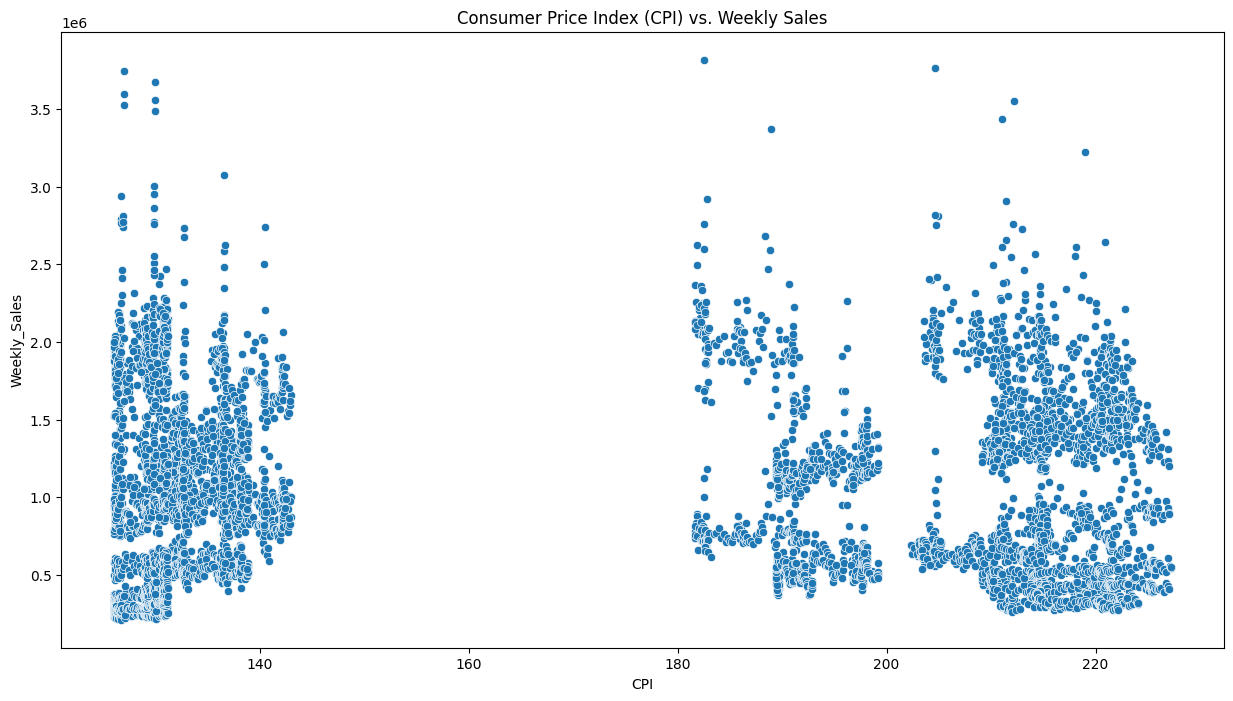

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df)
plt.title('Consumer Price Index (CPI) vs. Weekly Sales')

**Observations:**
-   The data points are widely spread, suggesting variability in sales across different CPI values.
-   There are clusters of points at different CPI levels, but no clear upward or downward trend is evident.
-  The dispersion indicates that weekly sales are influenced by multiple factors rather than just CPI alone.



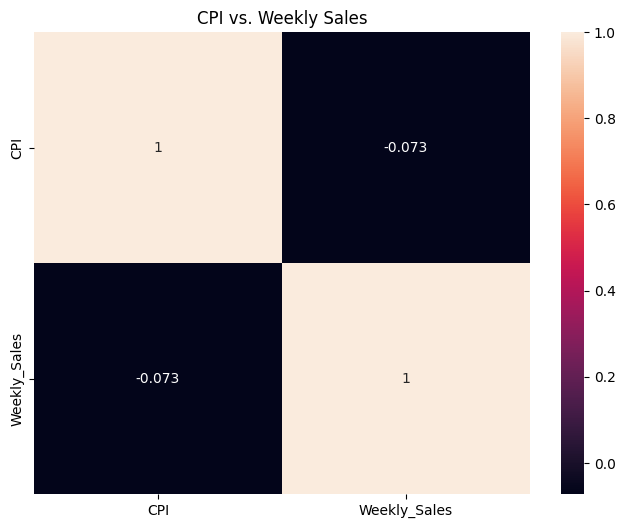

In [ ]:
cpi_sales_correlation = df[['CPI', 'Weekly_Sales']]

# Visualize the relationship using Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(cpi_sales_correlation.corr(), annot=True)
plt.title('CPI vs. Weekly Sales')
plt.show()

**Observation:**

 -  The overall correlation between CPI and weekly sales is -0.073.

 -  This suggests a very weak negative correlation, meaning that CPI has little to no significant impact on weekly sales when viewed across all stores.

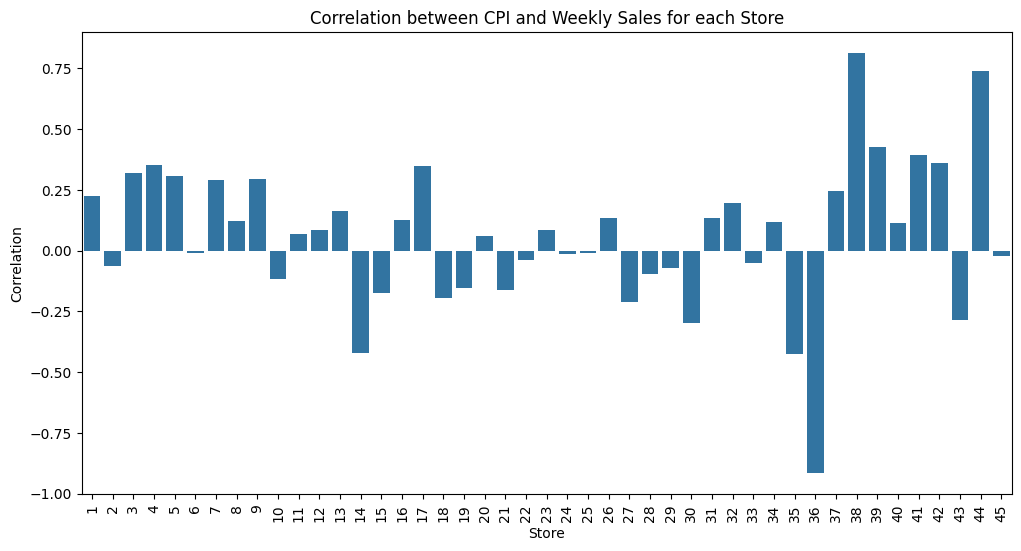

Stores with the highest positive correlation between CPI and Weekly Sales:
    Store  Correlation
37     38     0.812837
43     44     0.740150
38     39     0.428043
40     41     0.392293
41     42     0.360859

Stores with the highest negative correlation between CPI and Weekly Sales:
    Store  Correlation
35     36    -0.915095
34     35    -0.424107
13     14    -0.419755
29     30    -0.298188
42     43    -0.285686


In [ ]:
# Analyze the relationship between CPI and Weekly Sales for each store
store_cpi_sales = df.groupby('Store').apply(lambda x: np.corrcoef(x['CPI'], x['Weekly_Sales'])[0, 1]).reset_index(name='Correlation')

# Plot the correlation for each store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation', data=store_cpi_sales)
plt.title('Correlation between CPI and Weekly Sales for each Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

# Print stores with highest positive and negative correlations
print("Stores with the highest positive correlation between CPI and Weekly Sales:")
print(store_cpi_sales.sort_values('Correlation', ascending=False).head())

print("\nStores with the highest negative correlation between CPI and Weekly Sales:")
print(store_cpi_sales.sort_values('Correlation', ascending=True).head())

**Observations:**

 -  The correlation between CPI and weekly sales varies significantly across stores.
Some stores show a positive correlation (higher CPI associated with increased sales), while others show a negative correlation (higher CPI associated with decreased sales).

 -  A few stores exhibit strong positive or negative correlations, but many are near zero, indicating no strong relationship.

**Conclusion:**

  - CPI does not have a strong overall impact on weekly sales.
The effect of CPI on sales varies across stores, meaning that other factors (e.g., location, customer demographics, promotions) might play a more significant role in influencing sales.
  - A deeper analysis with additional variables may be needed to uncover the reasons behind these store-specific variations.

# **e. Top performing stores according to the historical data.**

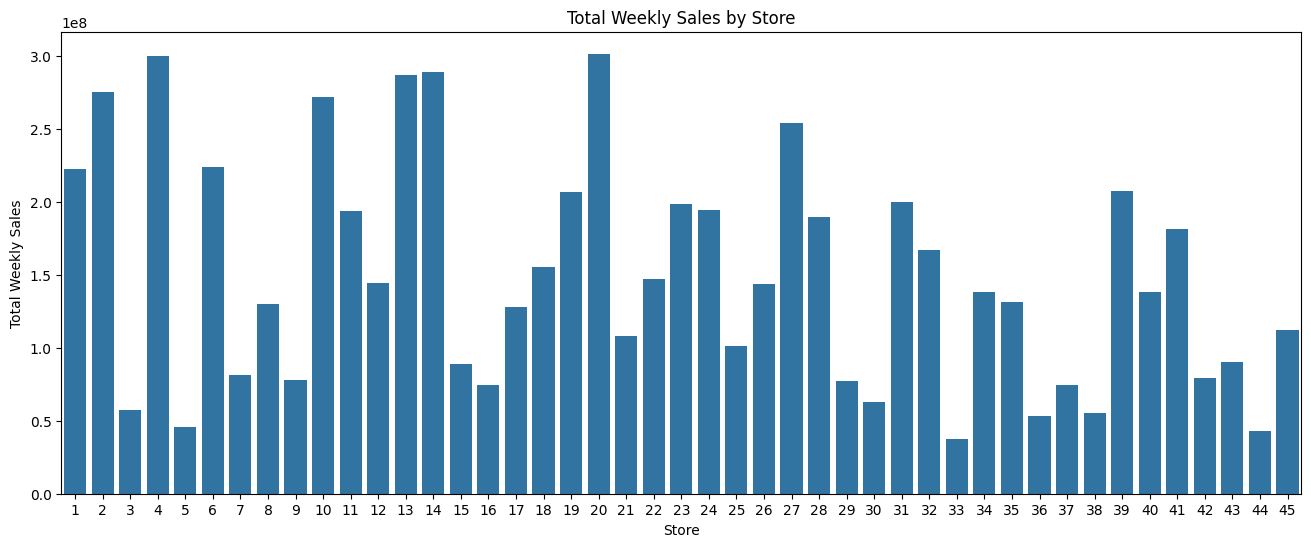

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df.groupby('Store')['Weekly_Sales'].sum().reset_index())
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

From the **Total Weekly Sales by Store** bar chart, we can identify the **top-performing stores** based on historical sales data.

### **Top Performing Stores:**
1. **Store 20** – Highest total weekly sales.
2. **Store 4** – Second highest.
3. **Store 14** – Close to store 4 in total sales.
4. **Store 13** – Similar performance to store 14.
5. **Store 3** – Among the top stores in total weekly sales.
6. **Store 10** – Another strong performer.

### **Key Insights:**
- These stores have consistently higher total weekly sales, indicating strong customer demand and performance.
- Store 20 stands out as the leader in sales, suggesting it could be in a prime location or have high customer traffic.
- Understanding what makes these stores successful (location, promotions, customer base, pricing) could help optimize strategies for other stores.



# **f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

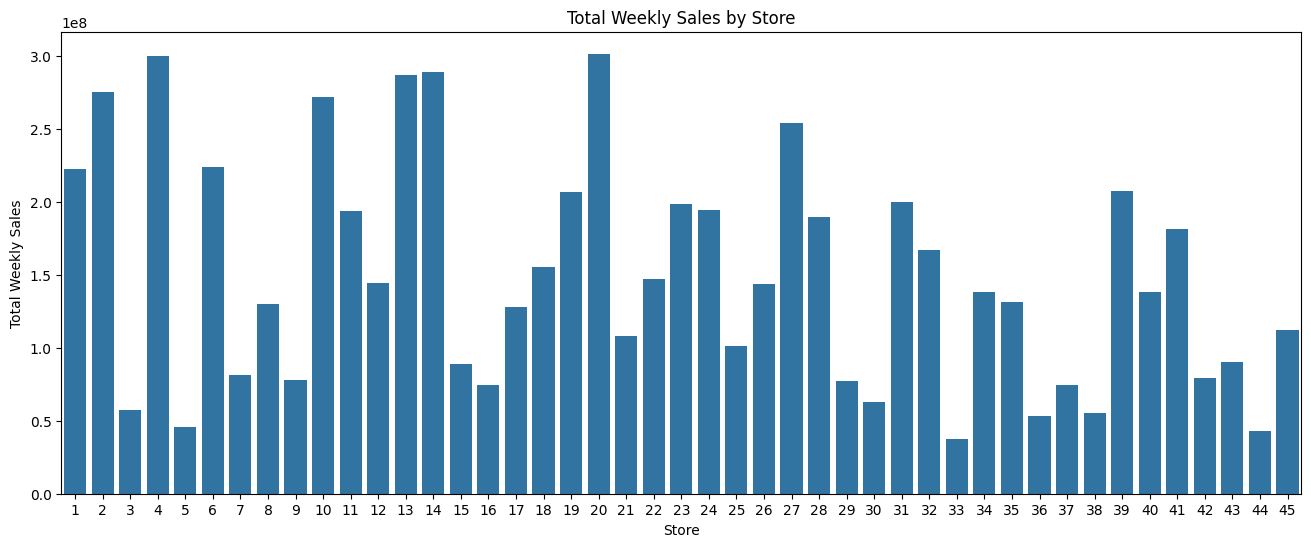

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df.groupby('Store')['Weekly_Sales'].sum().reset_index())
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

From the **Total Weekly Sales by Store** bar chart, we can identify the **worst-performing store** and analyze the difference between the highest and lowest sales.

### **Worst Performing Store:**
- **Store 33** appears to have the lowest total weekly sales, making it the worst-performing store.

### **Significance of the Difference:**
- The **best-performing store (Store 20)** has **over 300 million** in total weekly sales.
- The **worst-performing store (Store 33)** has total weekly sales significantly lower (likely below 50 million).
- The difference between the highest and lowest performing stores is **massive**—around **250 million in total weekly sales**.

### **Key Takeaways:**
- The gap suggests that top stores have significantly higher foot traffic, better sales strategies, or more favorable locations.
- Store 33 might need a **performance review** to assess factors such as location, product availability, pricing strategy, or promotional effectiveness.


# **g. Use predictive modeling techniques to forecast the sales for each store for the next 12weeks**

**Checking For Seasonality and Stationarity**

In [ ]:
# Group data to weekly sales per store
df_weekly = df.groupby(['Store', pd.Grouper(key='Date', freq='W')])['Weekly_Sales'].sum().reset_index()

# Sort values by Date
df_weekly = df_weekly.sort_values(by=['Store', 'Date'])

def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("The series is NOT stationary. Differencing needed.")
    else:
        print("The series is stationary.")

# Check stationarity for the entire dataset
print("Stationarity check for the entire dataset:")
check_stationarity(df_weekly['Weekly_Sales'])  # Use the 'Weekly_Sales' column of df_weekly


Stationarity check for the entire dataset:
ADF Statistic: -4.624149498578301
p-value: 0.00011655869699901381
The series is stationary.


Text(0.5, 1.0, 'Weekly Sales Over Time')

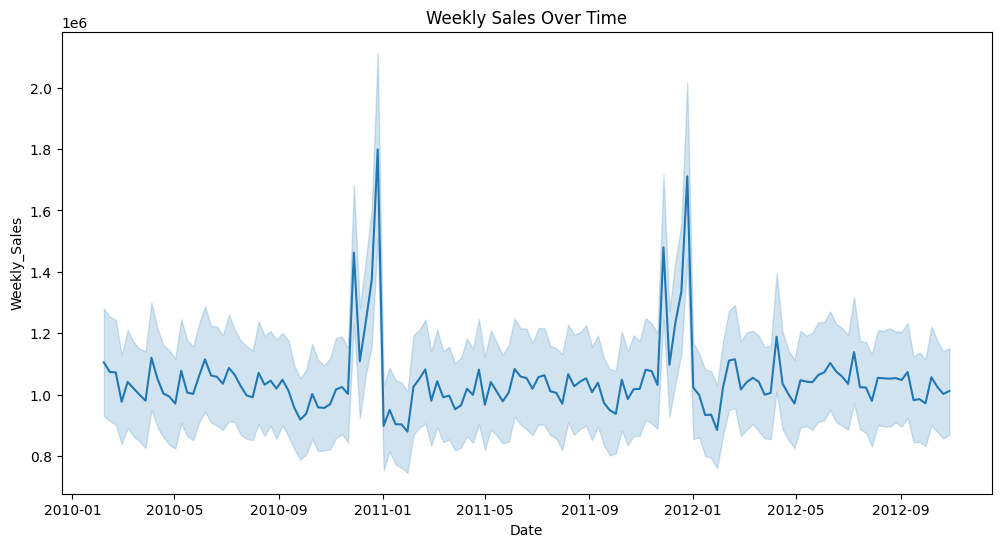

In [ ]:
# Checking for Seasonality Presence in our Dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df_weekly)
plt.title('Weekly Sales Over Time')

### **Summary: Choosing SARIMA Over ARIMA for Supermarket Sales Forecasting**  

#### **1. Stationarity Analysis**  
The **Augmented Dickey-Fuller (ADF) test** was conducted to check the stationarity of the dataset. The results are:  
- **ADF Statistic**: -4.6241 (highly negative)  
- **p-value**: 0.000116 (significantly less than 0.05)  

Since the **p-value is below 0.05**, we reject the null hypothesis, confirming that the **time series is stationary**. This means differencing (`d`) is not required for ARIMA.

#### **2. Seasonality Analysis**  
The **line plot of weekly sales** over time exhibits:  
- Recurring **spikes** at the end of each year (most likely due to holiday season demand).  
- A visible **seasonal pattern** with fluctuations repeating annually.  

This indicates that sales are not purely random but follow a **seasonal trend**.

#### **3. Why SARIMA Over ARIMA?**  

- **ARIMA** only accounts for short-term dependencies (trend) but cannot model **seasonal effects** (e.g., yearly cycles).  
- **SARIMA** extends ARIMA by incorporating **seasonal components** (`P, D, Q, s`), making it more suitable for datasets with **annual seasonality** (e.g., sales peaking during holidays).  

Since our dataset is **already stationary** but exhibits **strong seasonal trends**, SARIMA is the best choice over ARIMA.



**SARIMA MODELING**


Training SARIMA for Store 1...


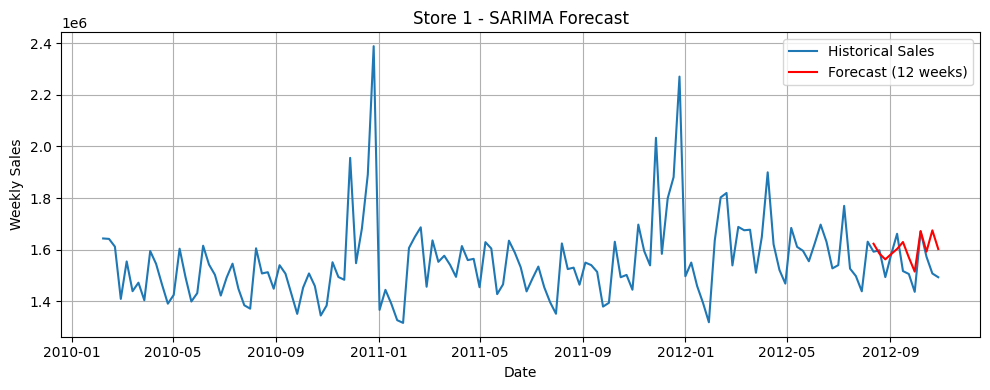


Training SARIMA for Store 2...


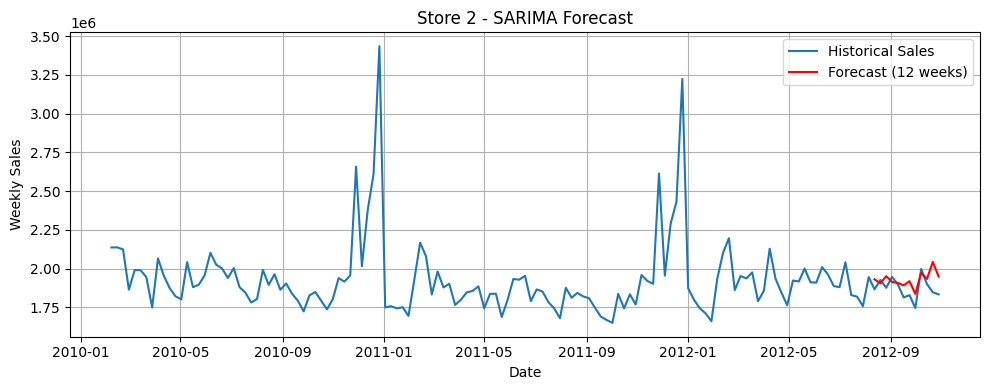


Training SARIMA for Store 3...


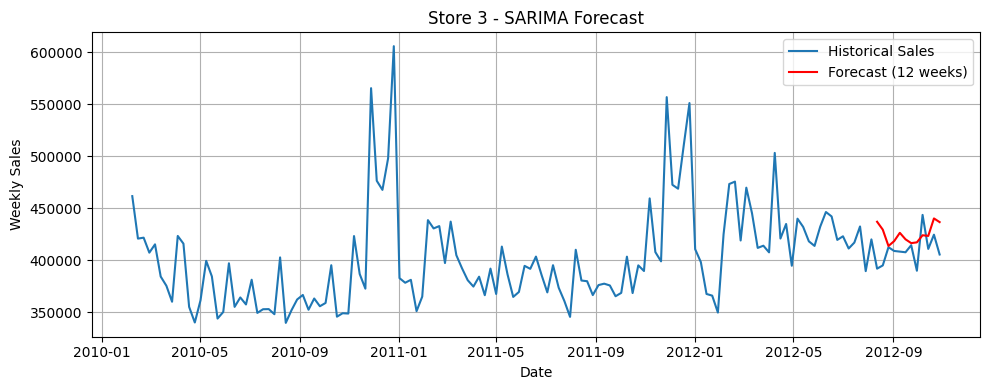


Training SARIMA for Store 4...


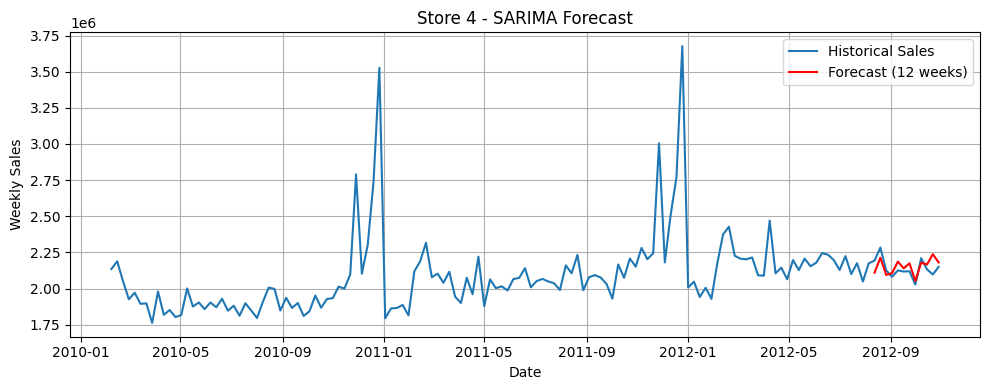


Training SARIMA for Store 5...


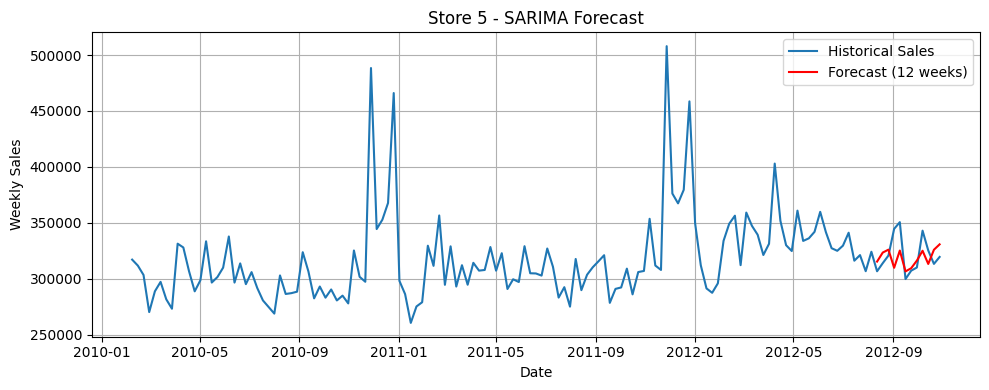


Training SARIMA for Store 6...


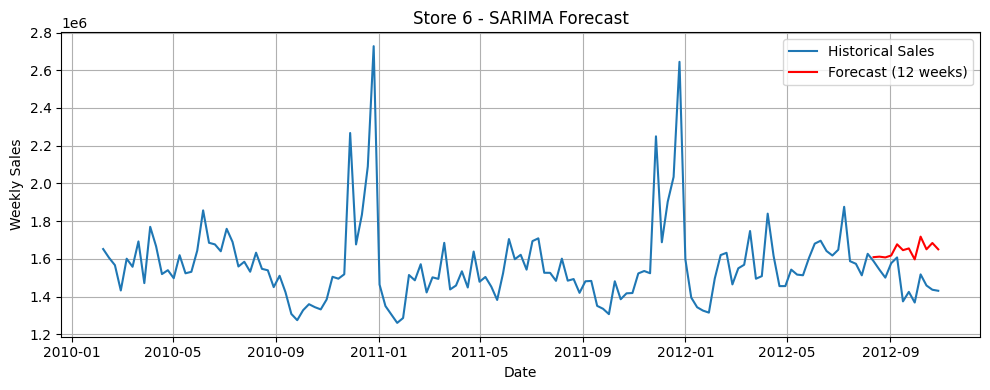


Training SARIMA for Store 7...


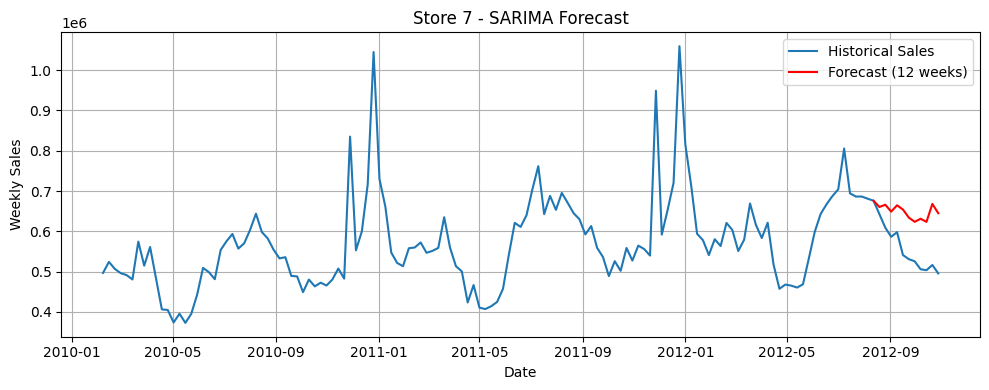


Training SARIMA for Store 8...


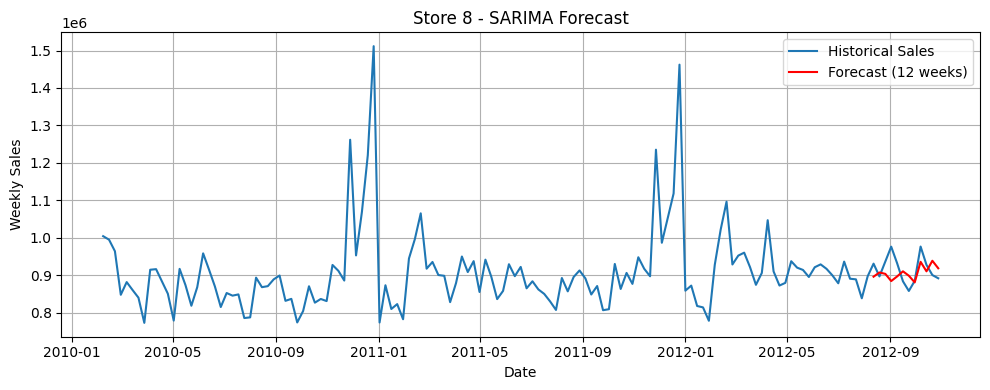


Training SARIMA for Store 9...


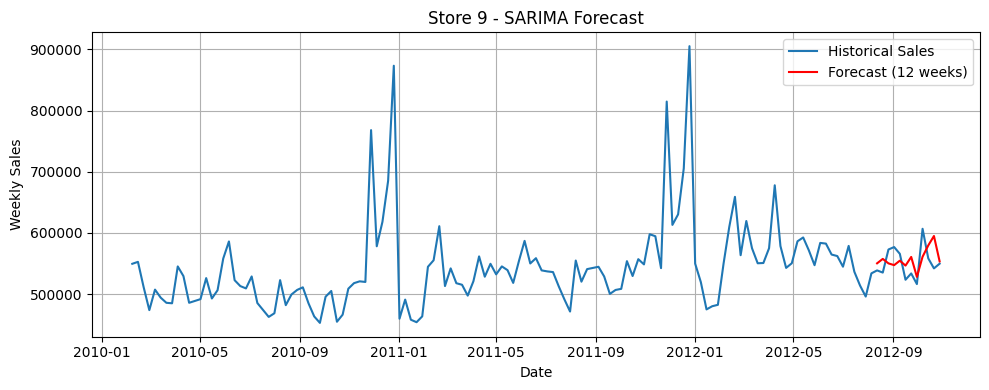


Training SARIMA for Store 10...


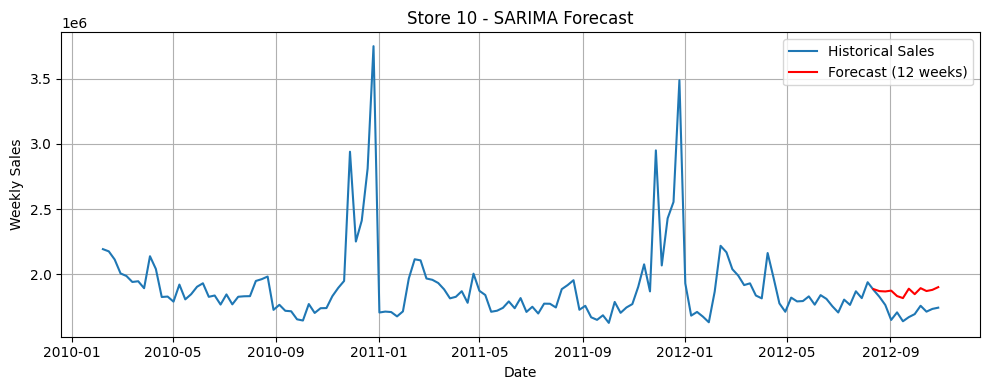


Training SARIMA for Store 11...


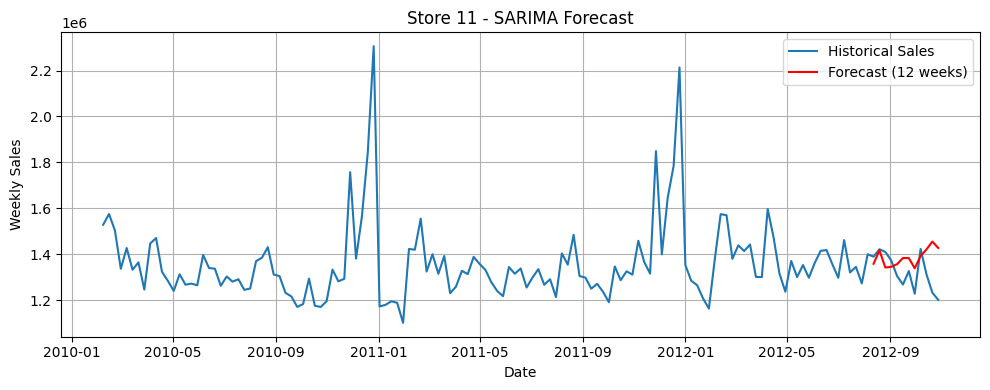


Training SARIMA for Store 12...


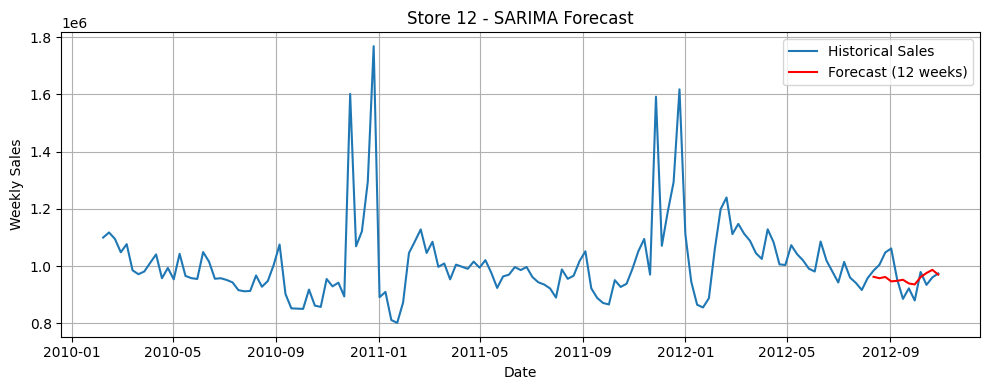


Training SARIMA for Store 13...


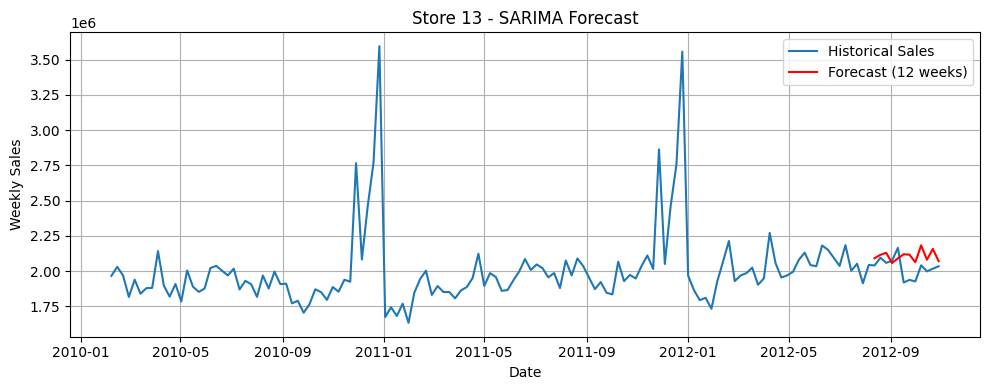


Training SARIMA for Store 14...


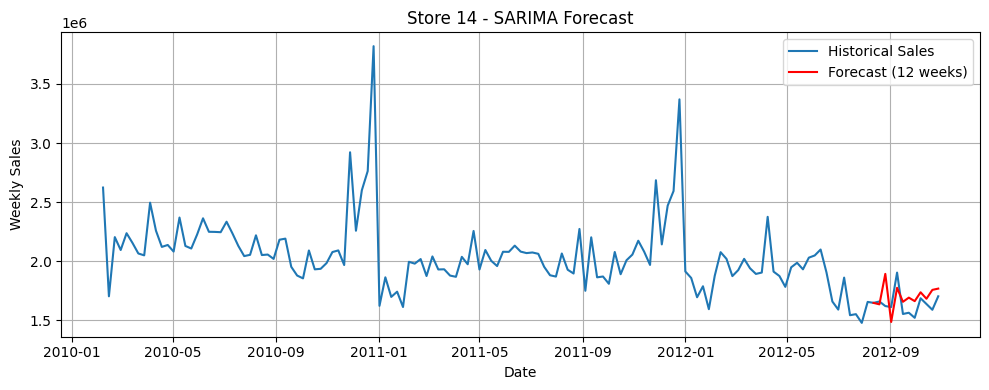


Training SARIMA for Store 15...


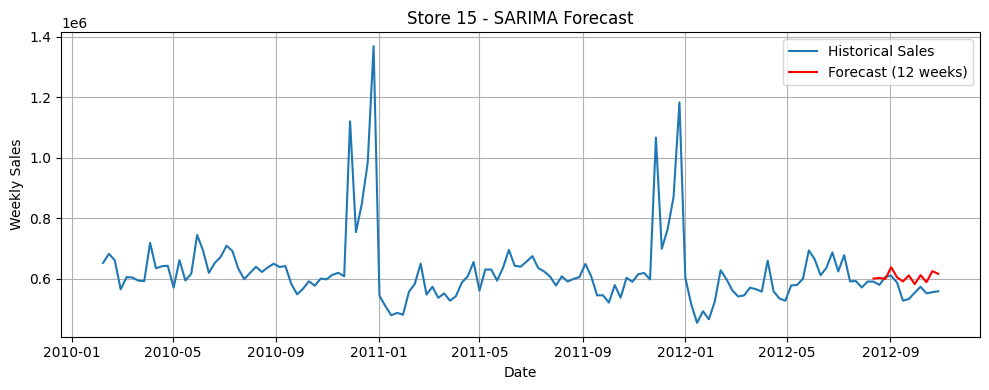


Training SARIMA for Store 16...


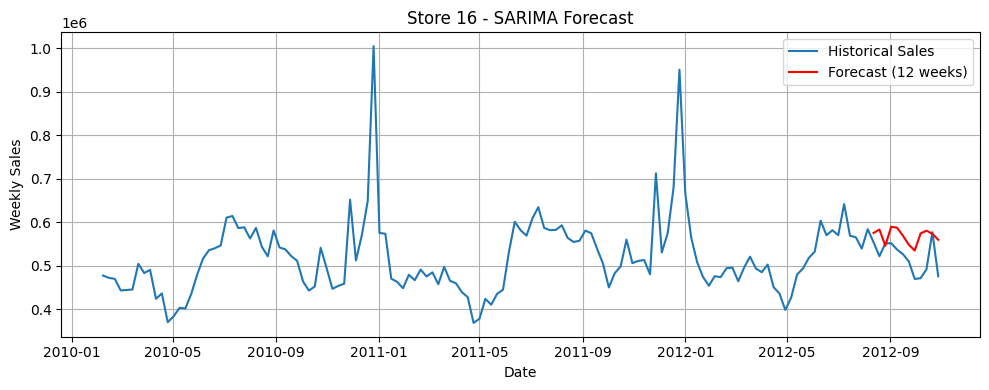


Training SARIMA for Store 17...


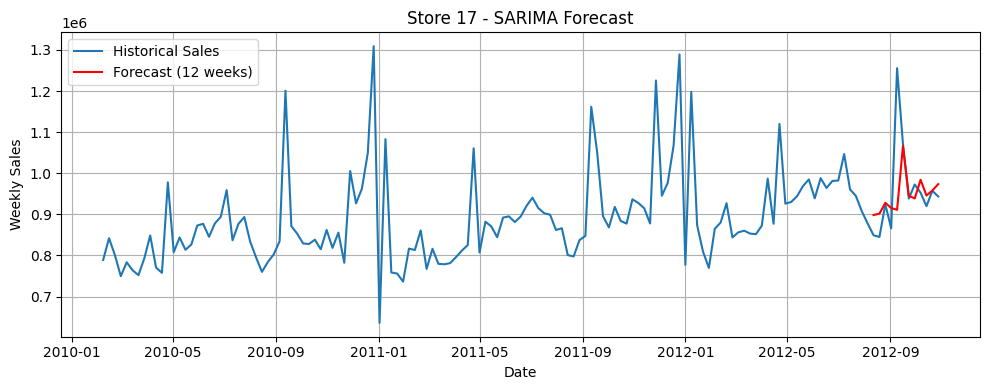


Training SARIMA for Store 18...


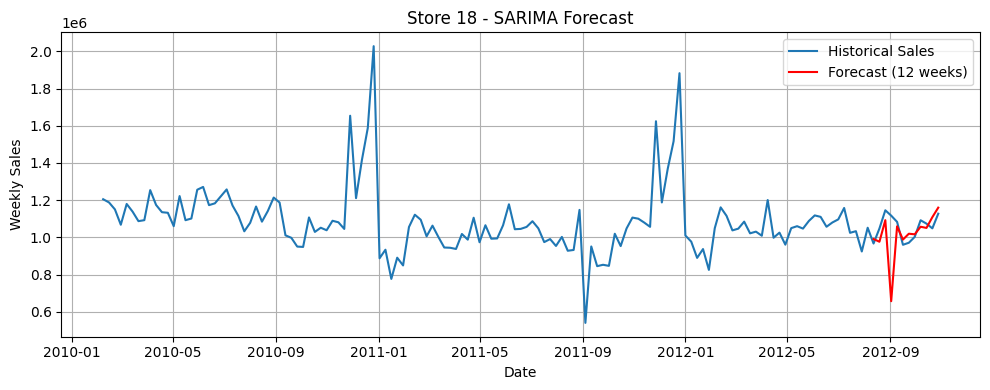


Training SARIMA for Store 19...


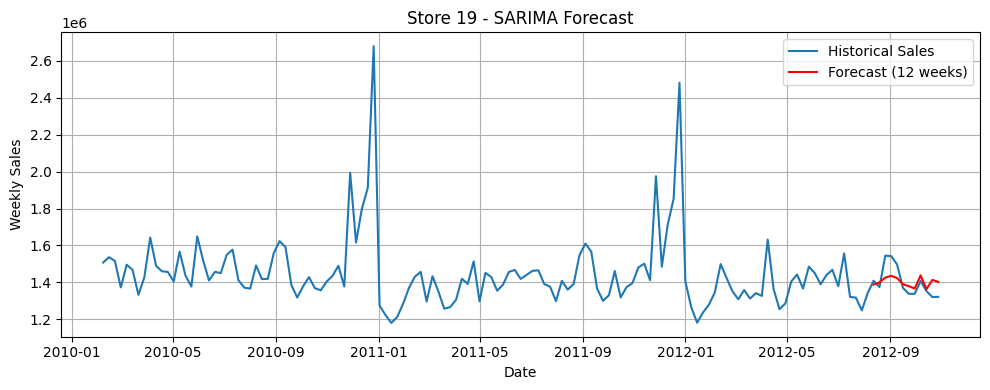


Training SARIMA for Store 20...


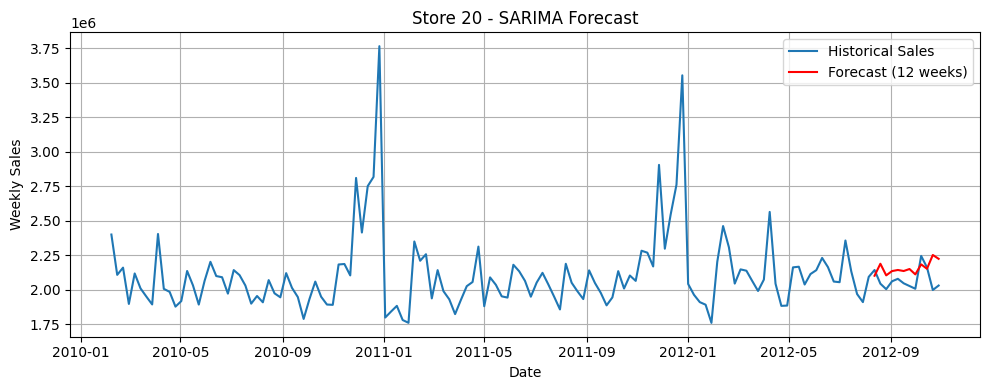


Training SARIMA for Store 21...


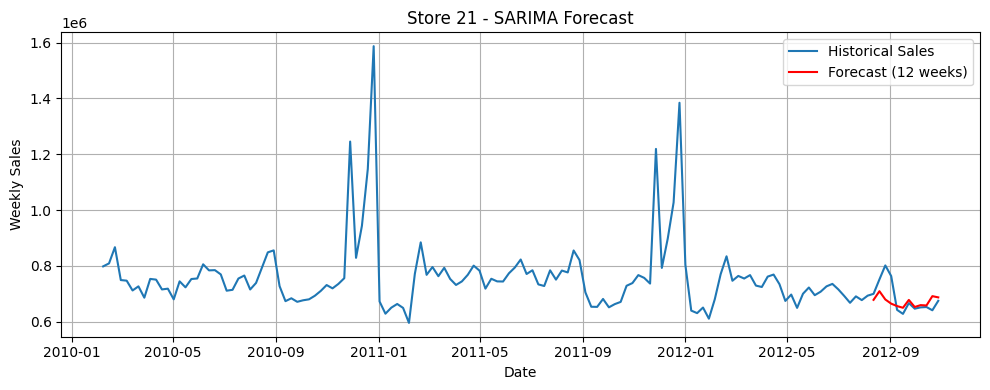


Training SARIMA for Store 22...


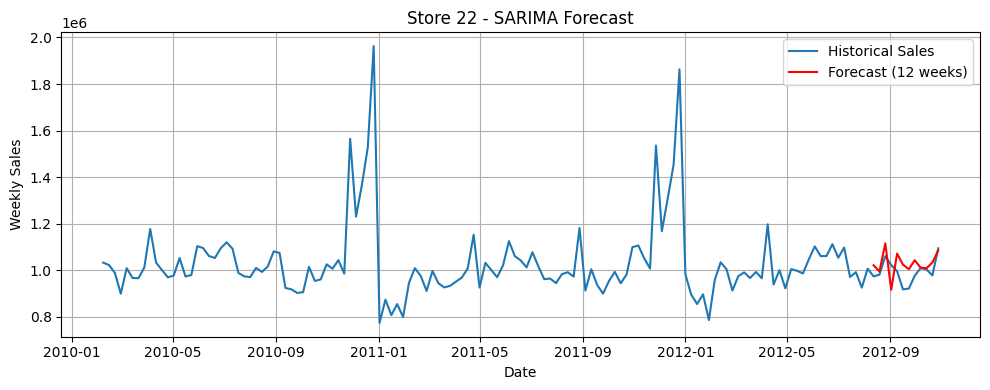


Training SARIMA for Store 23...


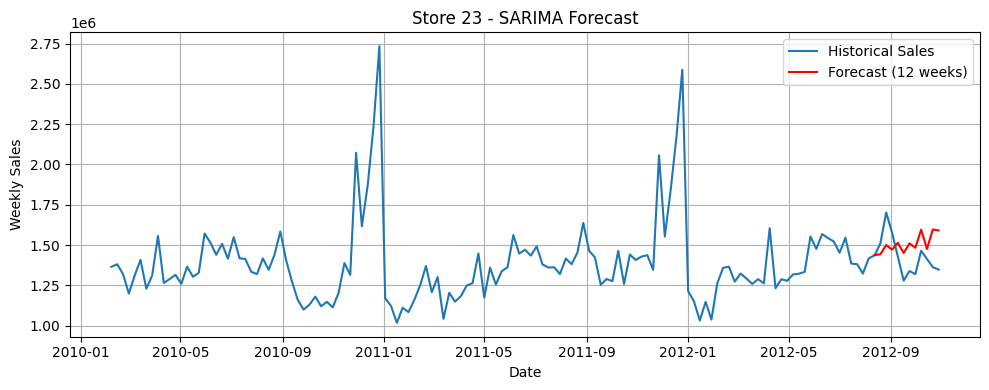


Training SARIMA for Store 24...


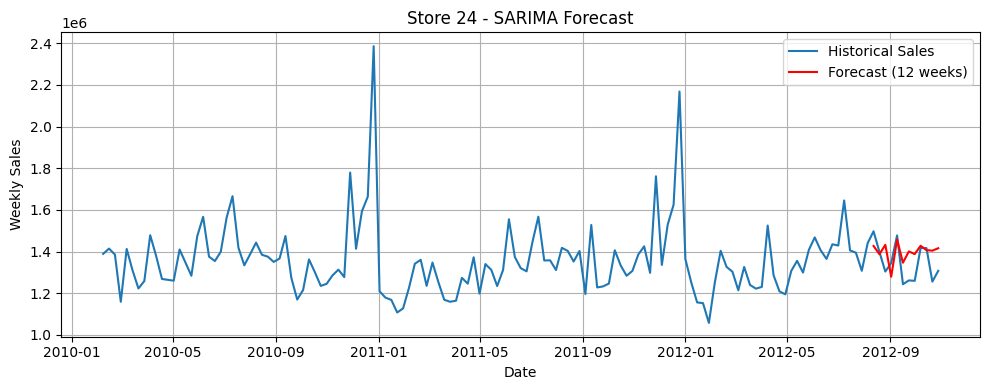


Training SARIMA for Store 25...


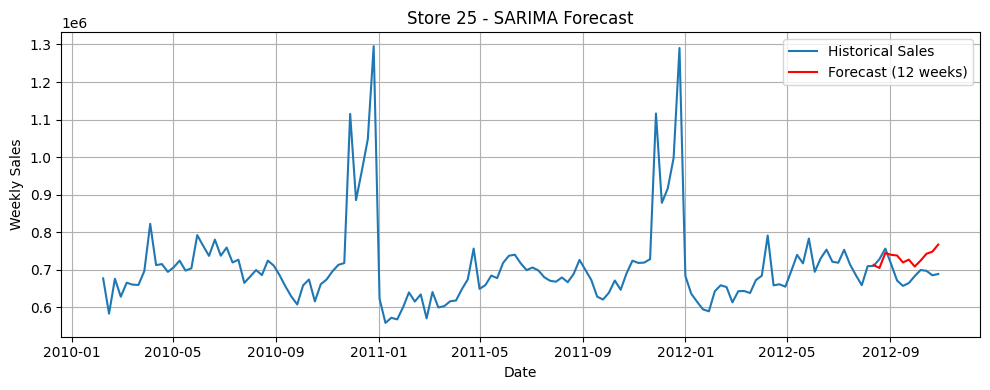


Training SARIMA for Store 26...


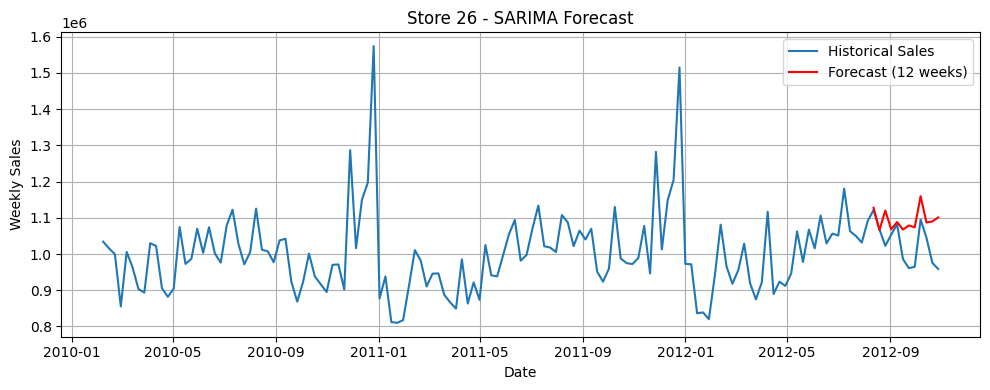


Training SARIMA for Store 27...


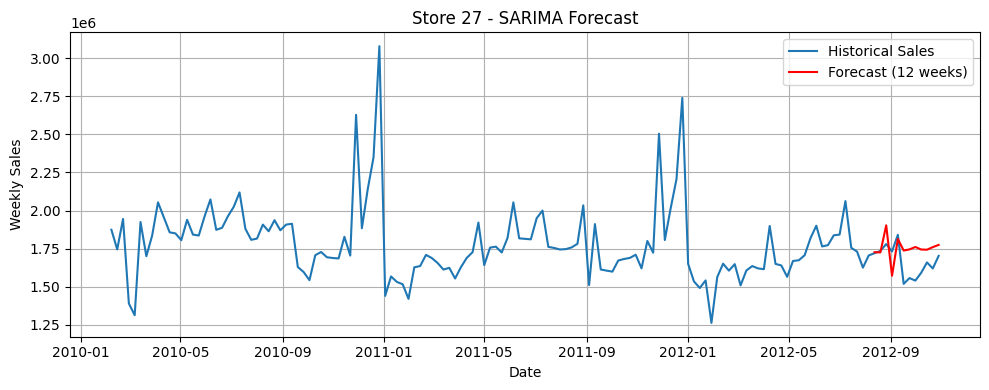


Training SARIMA for Store 28...


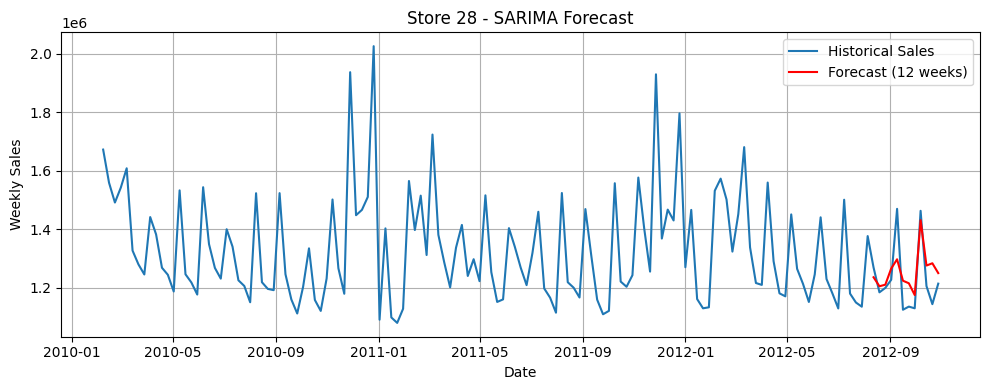


Training SARIMA for Store 29...


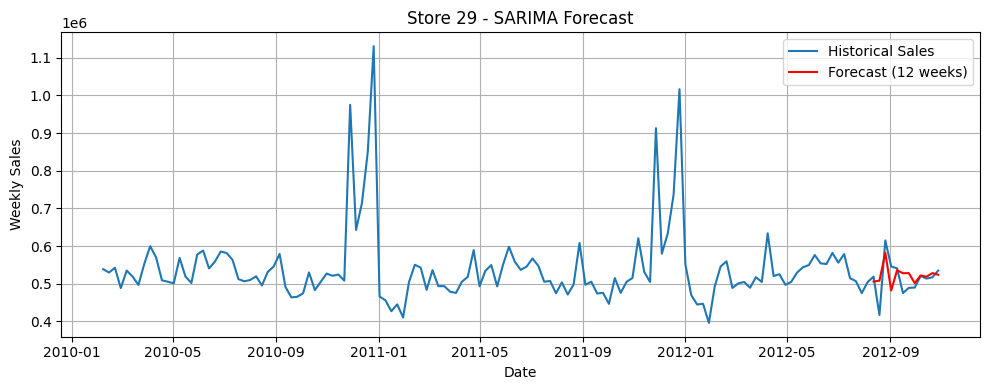


Training SARIMA for Store 30...


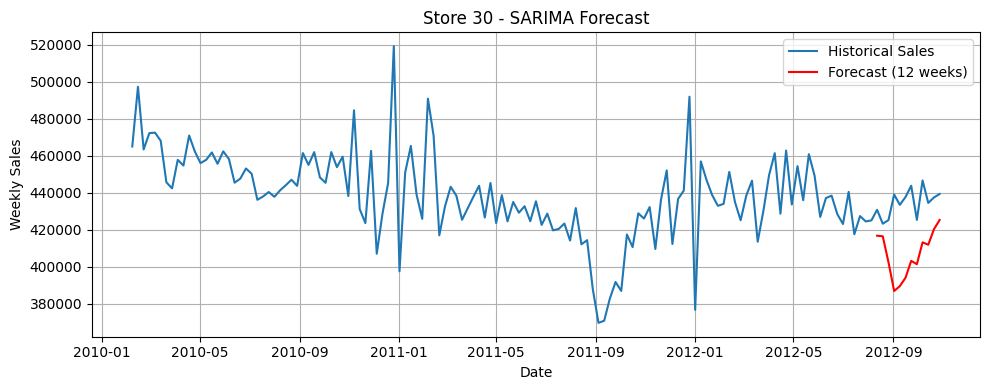


Training SARIMA for Store 31...


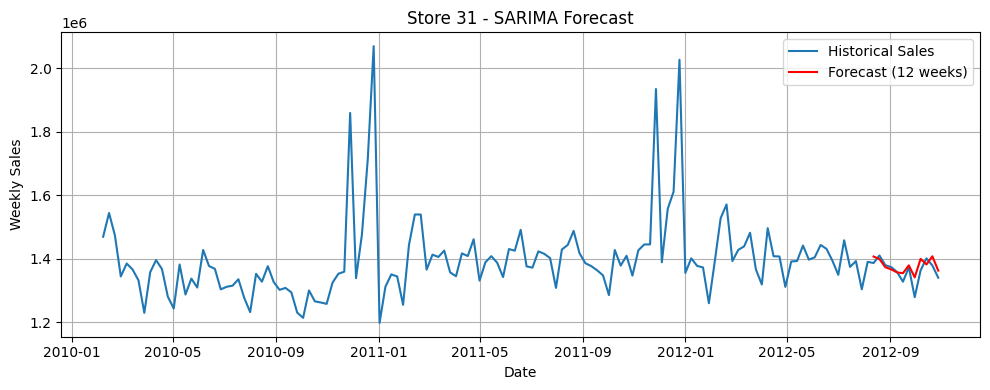


Training SARIMA for Store 32...


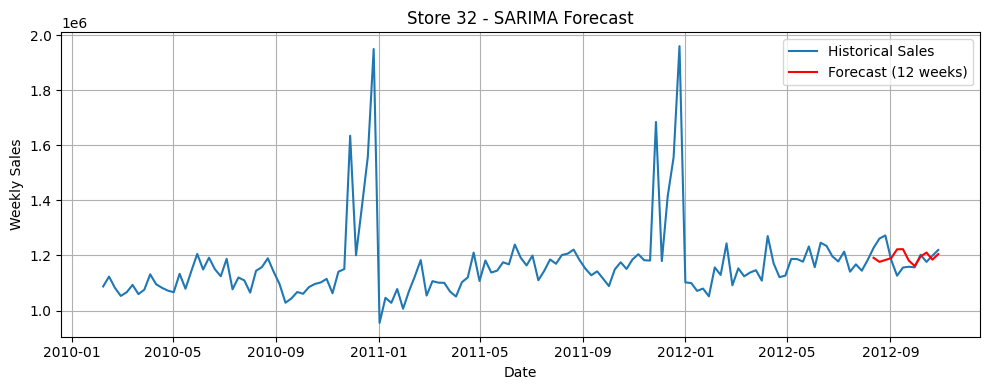


Training SARIMA for Store 33...


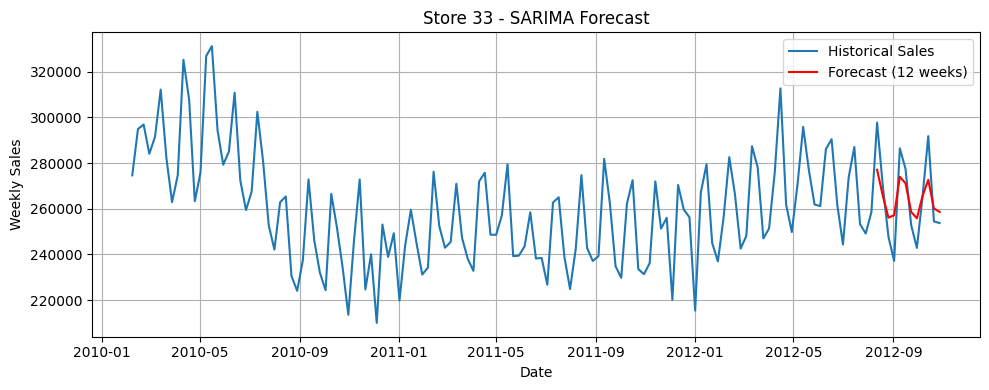


Training SARIMA for Store 34...


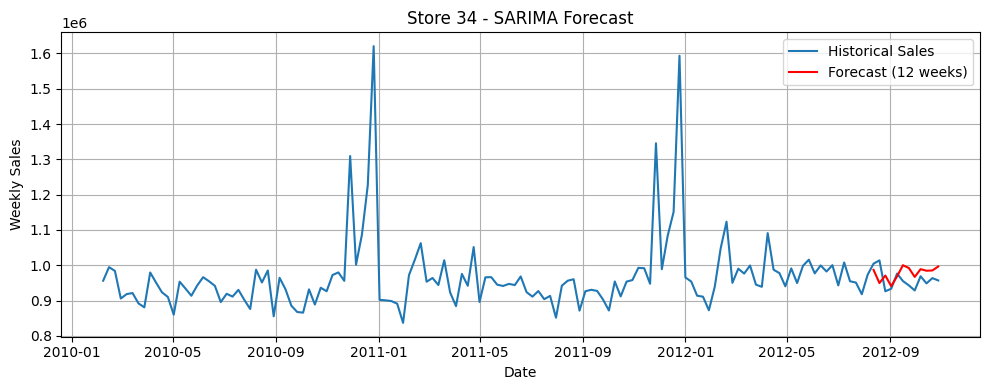


Training SARIMA for Store 35...


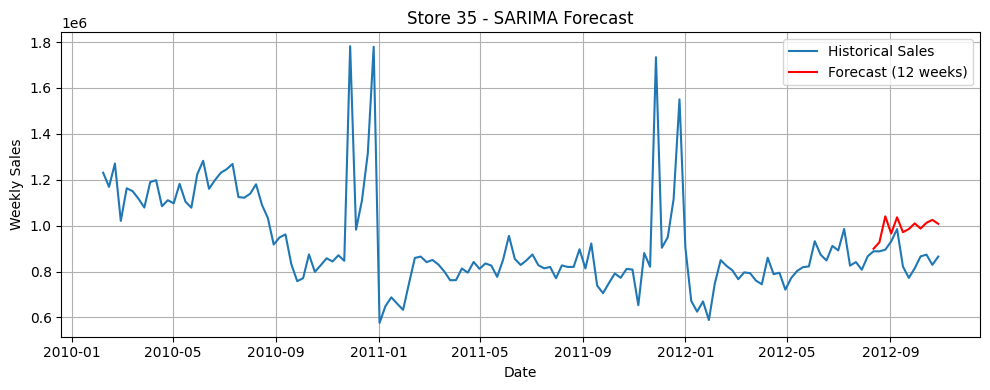


Training SARIMA for Store 36...


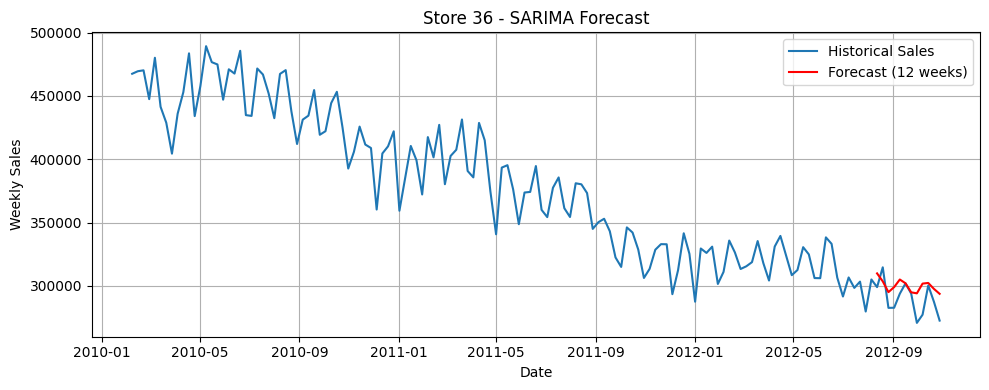


Training SARIMA for Store 37...


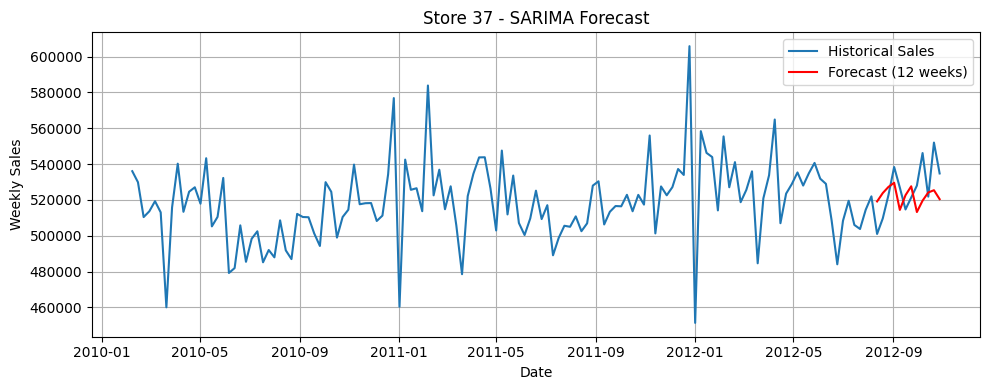


Training SARIMA for Store 38...


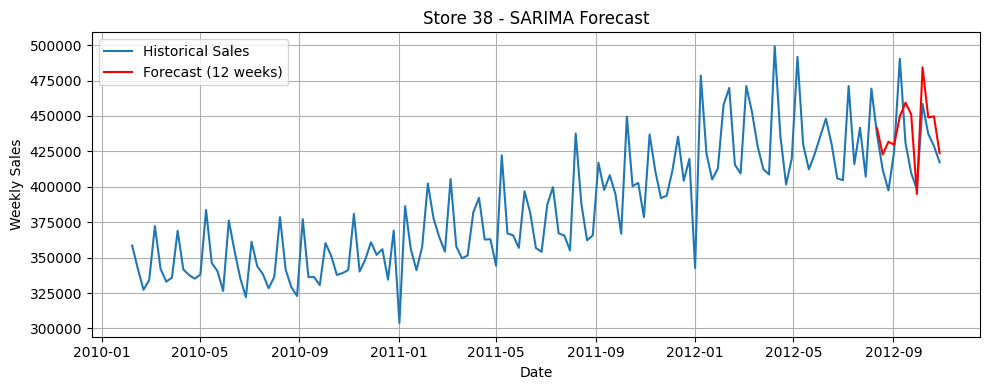


Training SARIMA for Store 39...


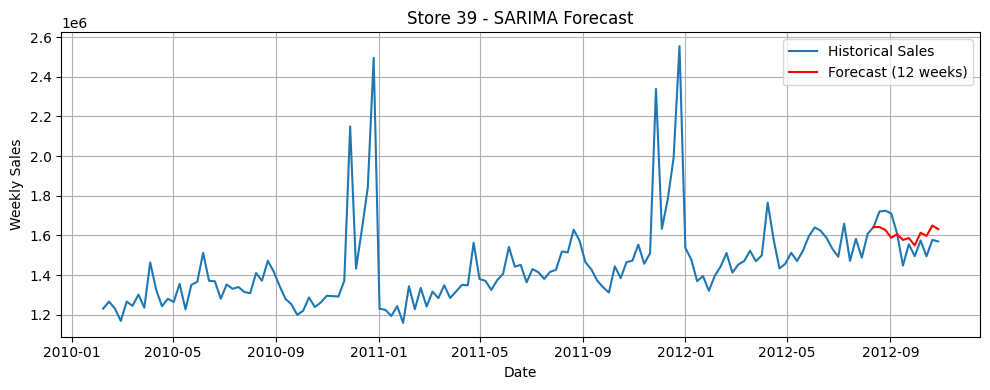


Training SARIMA for Store 40...


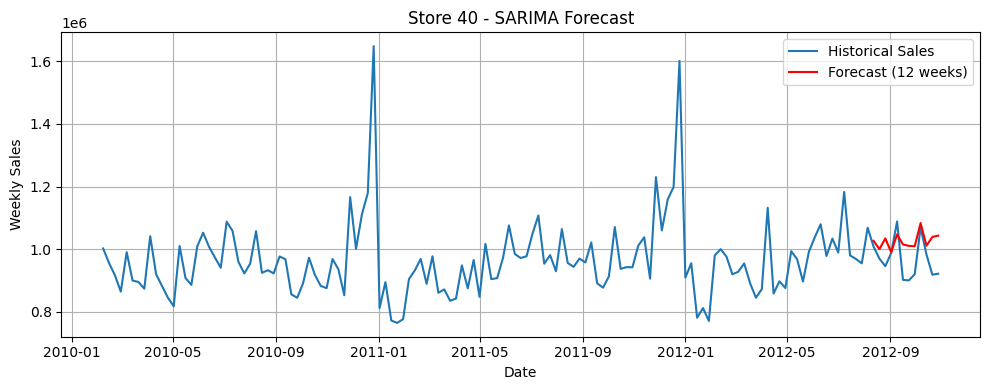


Training SARIMA for Store 41...


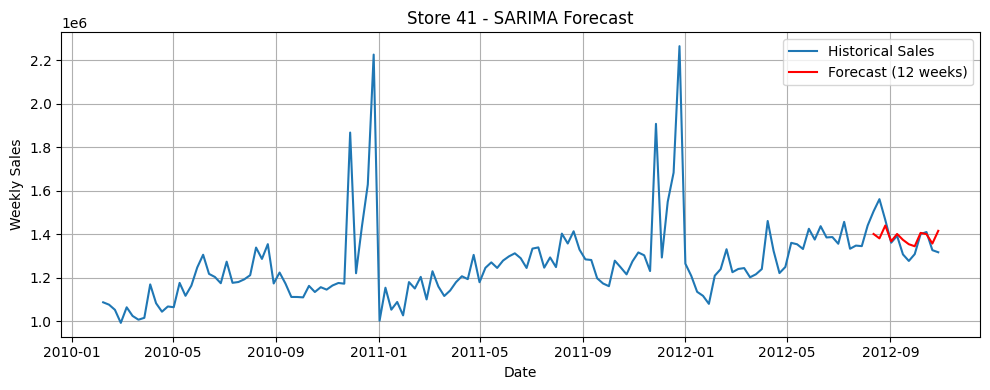


Training SARIMA for Store 42...


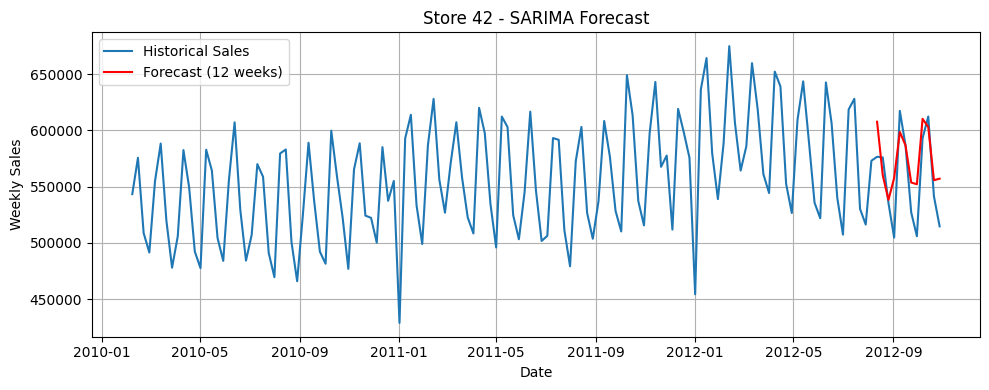


Training SARIMA for Store 43...


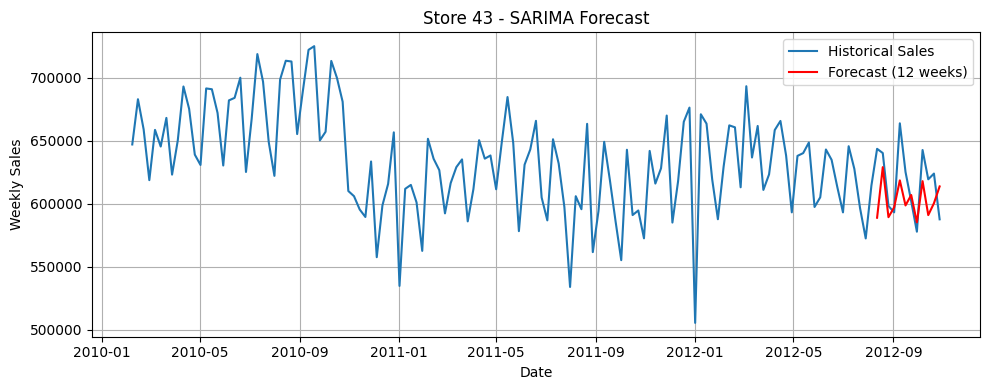


Training SARIMA for Store 44...


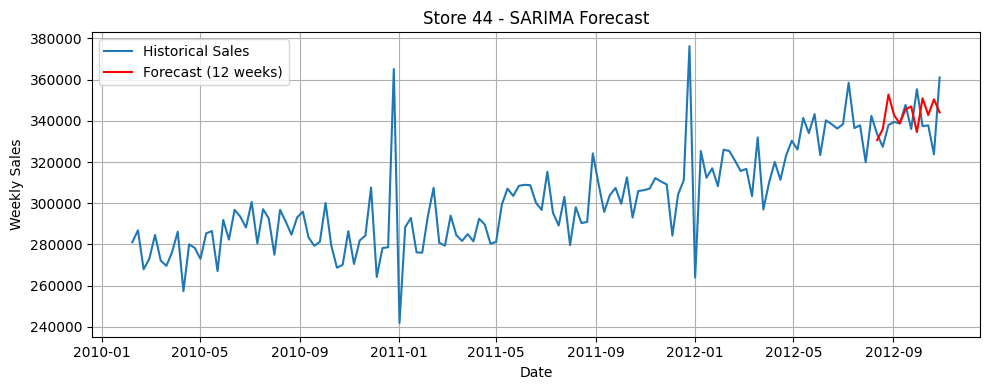


Training SARIMA for Store 45...


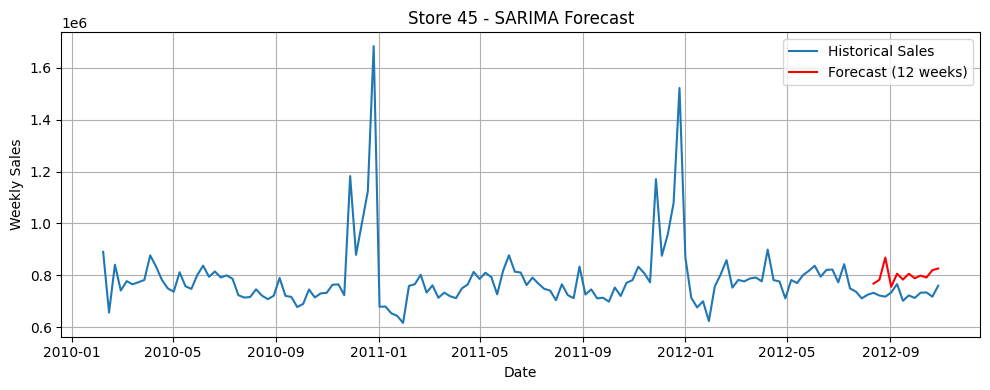

In [ ]:
# Dictionaries to store forecast & error calculation
store_forecasts = {}
all_actuals = []
all_predictions = []

# Forecast per store
for store in df['Store'].unique():
    print(f"\nTraining SARIMA for Store {store}...")

    store_data = df[df['Store'] == store][['Date', 'Weekly_Sales']].copy()
    store_data = store_data.sort_values('Date')
    store_data.set_index('Date', inplace=True)

    weekly_sales = store_data['Weekly_Sales'].resample('W').sum().dropna()

    # Ensure enough data for split
    if len(weekly_sales) >= 116:  # 2 years + 12 weeks
        try:
            # Split into train and test
            train = weekly_sales[:-12]
            test = weekly_sales[-12:]

            # Fit SARIMA
            model = SARIMAX(train,
                            order=(2, 1, 2),
                            seasonal_order=(0, 0, 1, 52),
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            model_fit = model.fit(disp=False)

            # Forecast next 12 weeks
            forecast = model_fit.forecast(steps=12)
            store_forecasts[store] = forecast

            # Collect actual and forecast values for overall evaluation
            all_actuals.extend(test.values)
            all_predictions.extend(forecast.values)

            # Plot (optional)
            plt.figure(figsize=(10, 4))
            plt.plot(weekly_sales, label='Historical Sales')
            plt.plot(forecast.index, forecast, label='Forecast (12 weeks)', color='red')
            plt.title(f"Store {store} - SARIMA Forecast")
            plt.xlabel("Date")
            plt.ylabel("Weekly Sales")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"⚠️ Skipping Store {store} due to error: {e}")
    else:
        print(f"⚠️ Skipping Store {store} due to insufficient data.")


In [ ]:
# ✅ Compute overall evaluation metrics
if all_actuals and all_predictions:
    SARIMA_mse = mean_squared_error(all_actuals, all_predictions)
    SARIMA_rmse = np.sqrt(mse)
    print(f"\n✅ Overall MSE across all stores: {SARIMA_mse:.2f}")
    print(f"✅ Overall RMSE across all stores: {SARIMA_rmse:.2f}")
else:
    print("⚠️ Not enough data to compute overall metrics.")



✅ Overall MSE across all stores: 6893074587.49
✅ Overall RMSE across all stores: 94309.81


***XG Boost Model***

In [ ]:
# Lists to hold global predictions and actuals
global_preds = []
global_actuals = []

# Store-wise forecasts for optional review
store_forecasts = {}

# Loop through each store
for store in df['Store'].unique():
    try:
        store_data = df[df['Store'] == store].copy()
        store_data.set_index('Date', inplace=True)

        # Weekly resampling
        weekly_sales = store_data['Weekly_Sales'].resample('W').sum().dropna().to_frame()

        # Lag features
        for lag in range(1, 5):
            weekly_sales[f'lag_{lag}'] = weekly_sales['Weekly_Sales'].shift(lag)

        # Time features
        weekly_sales['weekofyear'] = weekly_sales.index.isocalendar().week.astype(int)
        weekly_sales['month'] = weekly_sales.index.month
        weekly_sales['year'] = weekly_sales.index.year

        weekly_sales.dropna(inplace=True)

        if len(weekly_sales) <= 20:
            continue

        # Train/Test Split
        train = weekly_sales[:-12]
        test = weekly_sales[-12:]

        X_train = train.drop('Weekly_Sales', axis=1)
        y_train = train['Weekly_Sales']
        X_test = test.drop('Weekly_Sales', axis=1)
        y_test = test['Weekly_Sales']

        # Train XGBoost
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        preds = model.predict(X_test)

        # Store results for global eval
        global_preds.extend(preds)
        global_actuals.extend(y_test.values)

        # Optional: Store forecast per store
        store_forecasts[store] = preds

    except Exception as e:
        print(f"⚠️ Store {store} skipped due to error: {e}")


In [ ]:
# Global metrics
global_mse = mean_squared_error(global_actuals, global_preds)
global_rmse = np.sqrt(global_mse)

print(f"🌐 Global MSE: {global_mse:.2f}")
print(f"🌐 Global RMSE: {global_rmse:.2f}")


🌐 Global MSE: 3165635176.28
🌐 Global RMSE: 56263.98


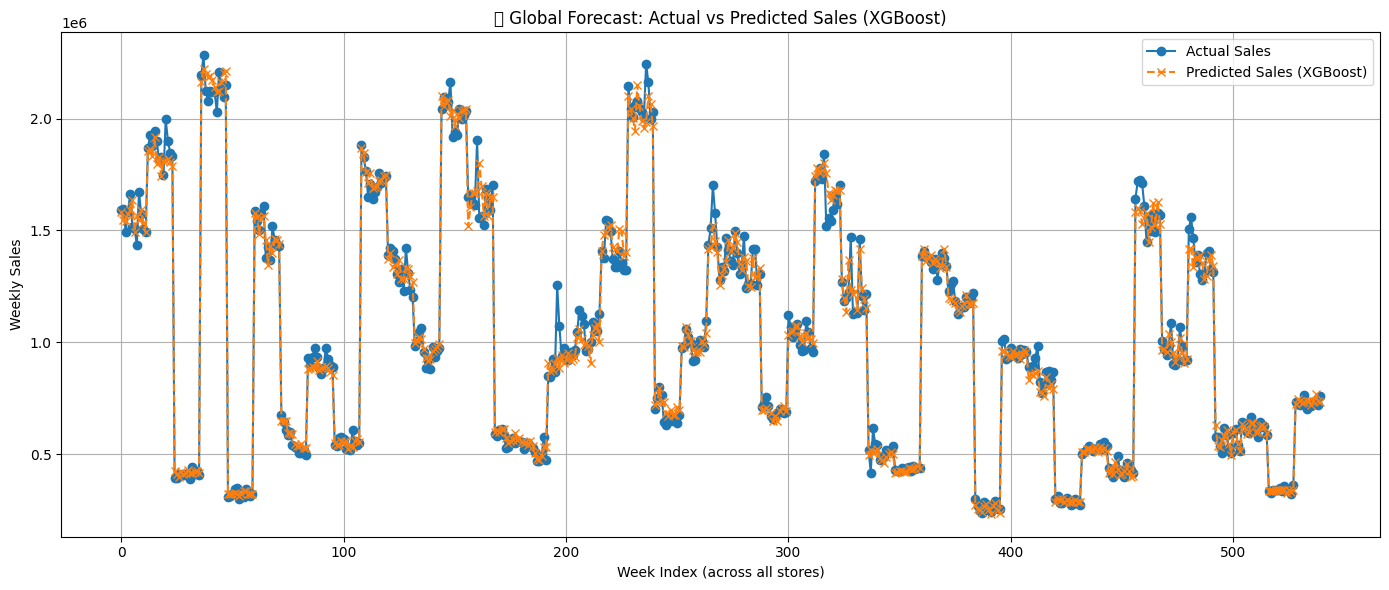

In [ ]:
# Convert to NumPy arrays
global_preds = np.array(global_preds)
global_actuals = np.array(global_actuals)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(global_actuals, label='Actual Sales', marker='o')
plt.plot(global_preds, label='Predicted Sales (XGBoost)', marker='x', linestyle='--')

plt.title("📈 Global Forecast: Actual vs Predicted Sales (XGBoost)")
plt.xlabel("Week Index (across all stores)")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **DEEP LEARNING MODEL**

In [ ]:
# Data preprocessing for deep learning
scaler = MinMaxScaler()
df_weekly['Weekly_Sales_scaled'] = scaler.fit_transform(df_weekly[['Weekly_Sales']])

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12  # Adjust sequence length as needed
X_global, y_global = create_sequences(df_weekly['Weekly_Sales_scaled'].values, seq_length)

# Split data
train_size = int(len(X_global) * 0.8)
X_train, X_test = X_global[:train_size], X_global[train_size:]
y_train, y_test = y_global[:train_size], y_global[train_size:]

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(seq_length, 1)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train.reshape(-1, seq_length, 1), y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test.reshape(-1, seq_length, 1))
y_pred = scaler.inverse_transform(y_pred_scaled)


Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0209
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0025
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0027
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0024
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0026
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0024
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0023
Epoch 12/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023
Epoch 13/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0021
Epoch 14/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0020
Epoch 15/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms

Deep Learning Model RMSE (original scale): 95187.24
Deep Learning Model MSE (original scale): 9060609910.81


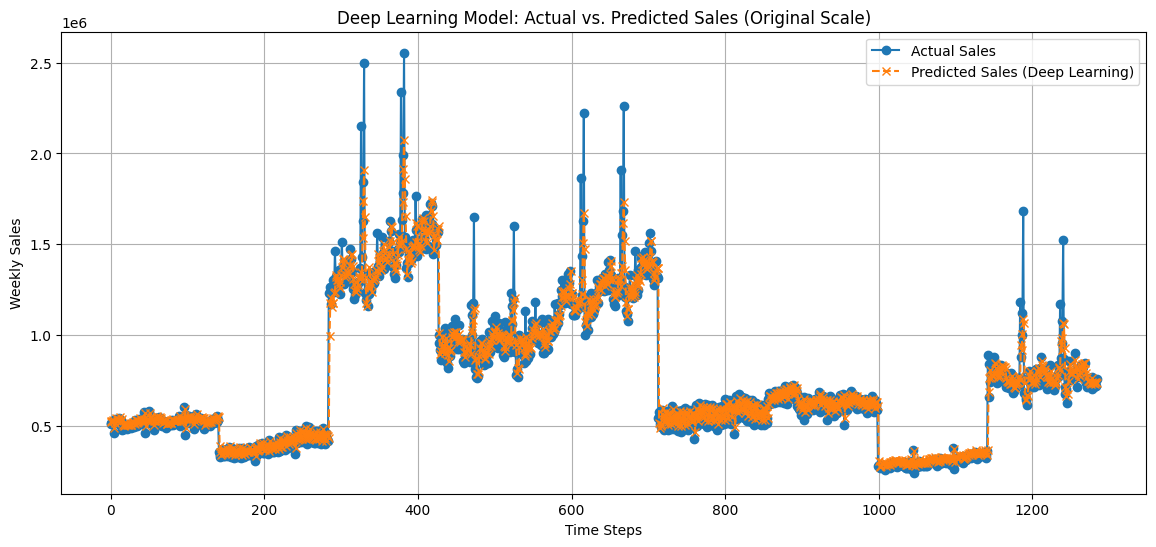

In [ ]:
# Inverse transform the scaled predictions to the original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)) # Reshape y_test before inverse transform

# Evaluate the model with original scale data
DL_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
DL_mse = mean_squared_error(y_test_original, y_pred)


print(f"Deep Learning Model RMSE (original scale): {DL_rmse:.2f}")
print(f"Deep Learning Model MSE (original scale): {DL_mse:.2f}")

# Plot the predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test_original, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales (Deep Learning)', marker='x', linestyle='--')
plt.title('Deep Learning Model: Actual vs. Predicted Sales (Original Scale)')
plt.xlabel('Time Steps')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a dictionary to store the model results
model_results = {
    'Model': ['SARIMA', 'XGBoost', 'Deep Learning'],
    'RMSE': [SARIMA_rmse, global_rmse, DL_rmse],
    'MSE': [SARIMA_mse, global_mse, DL_mse]
}

# Create the DataFrame
results_df = pd.DataFrame(model_results)

# Print the DataFrame
results_df


Model          RMSE           MSE
0         SARIMA  94309.805072  6.893075e+09
1        XGBoost  56263.977608  3.165635e+09
2  Deep Learning  95187.236071  9.060610e+09

 Key Insights
-  XGBoost outperforms both SARIMA and Deep Learning with the lowest RMSE and MSE, indicating it captures the complex patterns in sales data more effectively.

-  SARIMA and Deep Learning models show similar RMSEs (~94–95k), but Deep Learning has a higher MSE, suggesting it's more inconsistent in some forecasts.

-  Even though LSTM models can handle sequence data, they often need more tuning, more data, and longer training to outperform traditional ML methods.

-   Recommendation
Based on the results, XGBoost is currently the most effective model for your supermarket sales forecasting task — offering the best trade-off between accuracy and complexity.